<b><h1 align="center">Exploratory Data Analysis</h1></b>
<i><h1 align="center">Análisis Exploratorio de Datos</h1></i>



---



## DEFINICIÓN DEL PROBLEMA

### Principal objetivo de análisis

Se busca establecer patrones de relación en los datos de ventas de la empresa que permitan describir y predecir ventas futuras. 

Como objetivo secundario se pretende establecer un modelo predictivo para el abastecimiento de inventario de productos específicos


### Entregables principales

-   Como resultado del análisis se deberá crear un reporte que incluya tablas resumen, gráficos, mapas y/o diagramas para presentar la información a los encargados de la toma de decisiones.
-   En base a los resultados obtenidos se hará una propuesta de los tipos de modelos predictivos que mejor se ajuste a los datos explorados.


### Roles y responsabilidades

-   Científico de datos: a los fines del presente proyecto el especialista en ciencia de datos deberá encargarse del proceso completo de extracción, limpieza, ingeniería y análisis de los datos, así como de la presentación de los  resultados del análisis.


## PREPARACIÓN DE LOS DATOS

### Fuentes de datos

Los datos internos fueron extraídos del CRM de la organización. El proceso de extracción consistió en la generación de informes de ventas anuales en formato excel. Dichos informes fueron consumidos en la etapa de limpieza y preparación, y transferidos a una base de datos en formato HDFS, conformada por DataFrames de Pandas.

Del mismo CRM también se extrajeron datos de clientes, en el mismo formato.

Se utilizarán fuentes de datos externos de variables macroeconómicas extraidos desde la página oficial del Banco Central de Chile.



### Cargar bibliotecas y datos
A continuación se cargarán las bibliotecas de Python a ser utilizadas en este documento. Para luego pasar a cargar los datos desde el archivo "data.h5".

In [86]:
# Cargar bibliotecas
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [87]:
# Cargar datos
ventas = pd.read_hdf("Data/data.h5", key="ventas", mode="r")
vme = pd.read_hdf("Data/data.h5", key="vme", mode="r")

### Características principales de los datos



In [88]:
# Dimensiones del DataFrame
ventas.shape

(188809, 28)

In [89]:
# Valor de muestra
ventas.head(1)

,Factura Venta,Fec. Fact. Venta,Cod. Producto,Descripción,Grupo,Subgrupo,Cantidad,Valor,Costo,Margen,...,Fec. Fact. Compra,Fec. Ing. Fact. Compra,Proveedor,OC,Nota Venta,Región (Softland),Comuna (Softland),Región (CRM),Comuna (CRM),Se calculó el costo
23,29009,2010-01-08,C9373A,TINTA AMARILLA 130ML HP 72 C9373A PARA PLOTTER...,INSUMOS HP,INSUMOS TINTAS PLOTTER HP,1.0,35165.0,30072.0,5093.0,...,2010-01-02,2010-02-02,TECNOGLOBAL S.A.,9013,100975,13,PROVIDENCIA,Región Metropolitana (de Santiago),Providencia,Si


In [90]:
# Informacion de tipo de columnas y conteo de nulls
ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188809 entries, 23 to 188676
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Factura Venta           188809 non-null  int64         
 1   Fec. Fact. Venta        188809 non-null  datetime64[ns]
 2   Cod. Producto           188809 non-null  object        
 3   Descripción             188809 non-null  object        
 4   Grupo                   188809 non-null  object        
 5   Subgrupo                188809 non-null  object        
 6   Cantidad                188809 non-null  float64       
 7   Valor                   188809 non-null  float64       
 8   Costo                   188809 non-null  float64       
 9   Margen                  188809 non-null  float64       
 10  Costo Manual            188809 non-null  float64       
 11  Recargo IVA             188809 non-null  float64       
 12  Rut                     18880

In [91]:
# Descripción de columnas numéricas
ventas.describe(include=[float, int]).T

,count,mean,std,min,25%,50%,75%,max
Factura Venta,188809.0,2.118504e+04,1.386383e+04,1.0,8236.0,20238.0,34165.0,4.510800e+04
Cantidad,188809.0,1.624027e+00,3.698262e+01,-4.0,1.0,1.0,1.0,1.000000e+04
Valor,188809.0,3.391423e+05,1.551688e+06,-2813720.0,33500.0,105600.0,348565.0,4.269105e+08
Costo,188809.0,2.859021e+05,1.978028e+06,-4462014.0,25812.0,84662.0,302094.0,5.231724e+08
Margen,188809.0,5.324020e+04,2.008717e+06,-506072400.0,4200.0,13873.0,43020.0,4.269105e+08
Costo Manual,188809.0,1.739602e+04,1.008210e+06,0.0,0.0,0.0,0.0,3.826196e+08
Recargo IVA,188809.0,1.651243e+01,2.115936e+03,0.0,0.0,0.0,0.0,6.650000e+05
Fact. Compra,188809.0,1.161233e+08,1.188755e+09,-1.0,42889.0,249143.0,716063.0,1.320001e+10
OC,188809.0,2.172444e+04,1.719592e+04,-1.0,13623.0,19390.0,26342.0,1.383150e+05
Nota Venta,188809.0,1.200500e+05,1.586118e+04,0.0,111525.0,120927.0,129958.0,1.417950e+05


*   Se puede observar que hay valores núméricos de magnitud "-1". Estos valores deben ser tratados de forma adecuada al momento de estimar métricas estadísticas.
*   Hay que evitar las cantidades con valores negativos. O asumír que estas son devoluciones o compras.



In [92]:
# Descripción de columnas tipo string
ventas.describe(include=[object]).T

,count,unique,top,freq
Cod. Producto,188809,7124,65272685MA,6311
Descripción,188809,6848,CCT ENTERPRISE/ETLA/MLP/SUBSCRIPTION HED L3 1S...,6311
Grupo,188809,59,ADOBE,43821
Subgrupo,188809,270,ADOBE EDUCACIONAL,22245
Rut,188809,5996,72.012.000-3,8187
Cliente,188809,6016,UNIVERSIDAD TECNOLOGICA DE CHILE INACAP,8187
Industria,188809,81,EDUCACION,32905
Vendedor,188809,70,CLAUDIA CHACÓN,41341
Tipo Vendedor,188809,7,VENDEDOR,139763
Proveedor,188809,633,TECNOGLOBAL S.A.,55896


[]

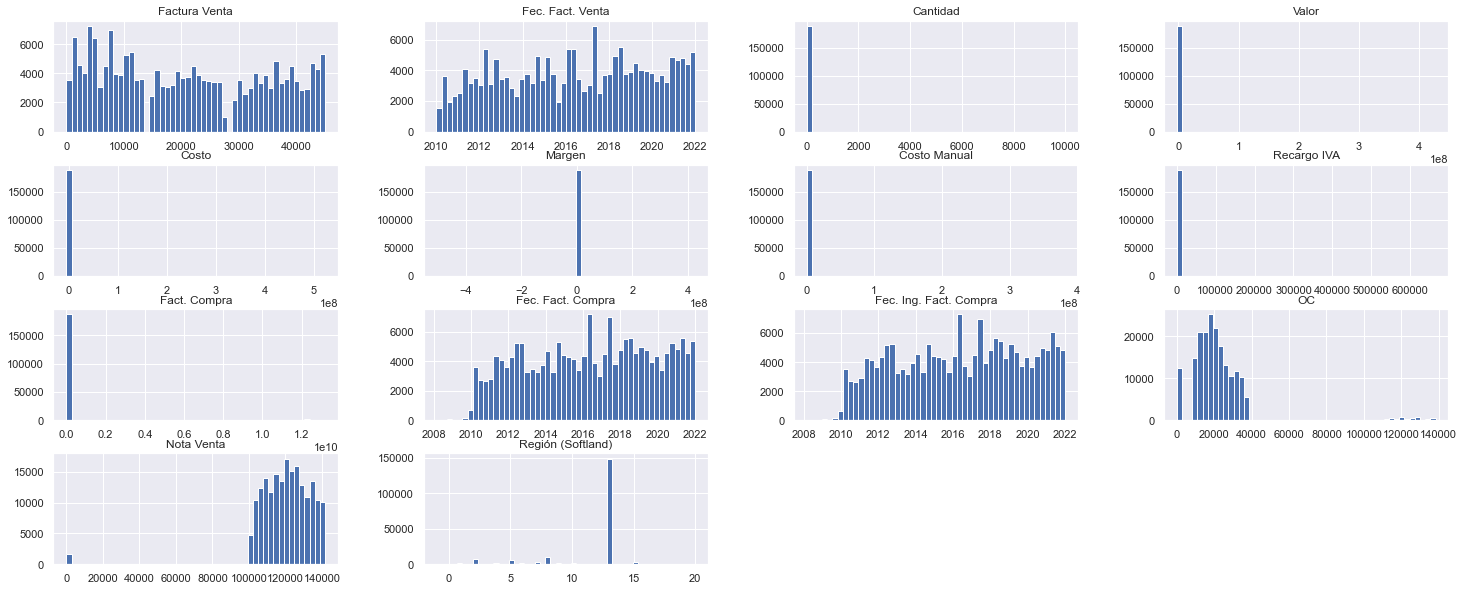

In [93]:
# Histograma por campo
ventas.hist(bins = 50, figsize=(25,10))
plt.plot()

La representacion por histograma de los valores numéricos no ayuda a entender que hay ciertas variables muy pocos valores probables, tal y como es de esperarse en el campo de "Cantidad". Muchas veces la cantidad será simplemente 1. Pero otros histogramas nos aportan otros datos interesantes:
- Al visualizar la distribución de "Fec. Fact. Venta" se puede observar un máximo siginifactiov en el 2017 y que en general la tendencia es al alza. También, se pueden observar ciclos repetitivos de ventas con un pérido de 3 años. Esto parece correponder a las suscripciones de ciertos productos Autodesk que se renovan cada 3 años.
- La distribución de valores de Región Softland parece indicar que la zona con mayor proporción de ventas es la región 13.

Para mejorar la visual de estos histogramas en particular, se extraen por separado en los siguientes gráficos.

[]

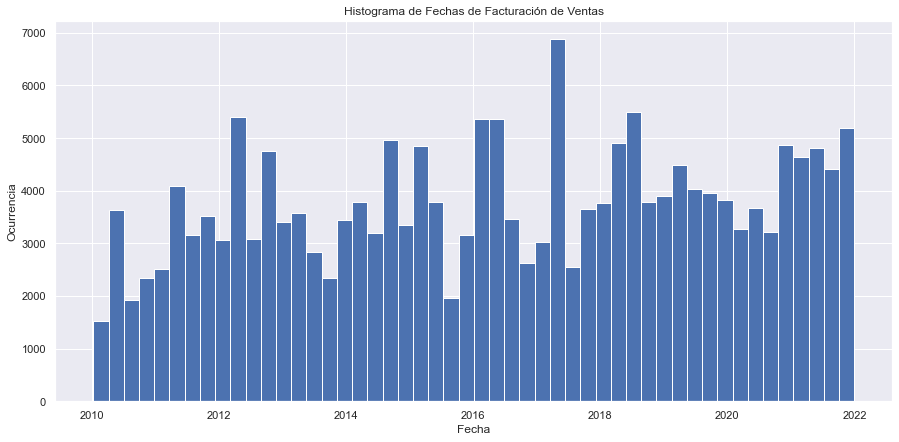

In [94]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_xlabel('Fecha')
ax.set_ylabel('Ocurrencia')
ax.set_title("Histograma de Fechas de Facturación de Ventas")
ventas["Fec. Fact. Venta"].hist(bins=50,ax=ax)

plt.plot()

[]

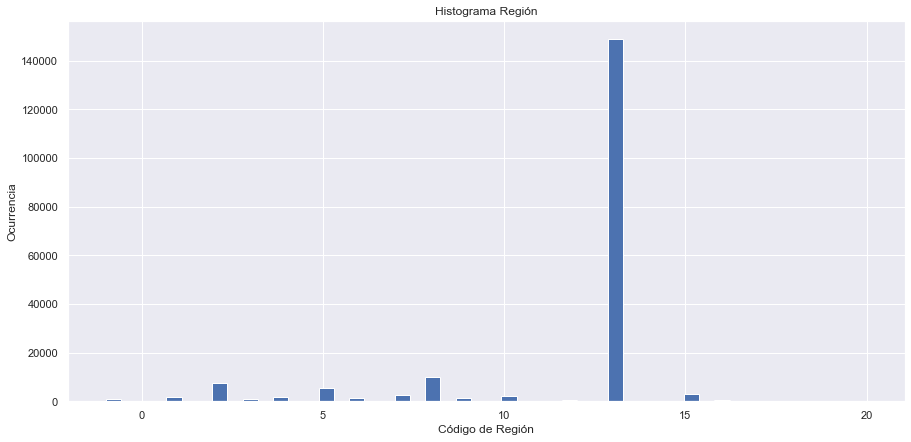

In [95]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_xlabel('Código de Región')
ax.set_ylabel('Ocurrencia')
ax.set_title("Histograma Región")
ventas["Región (Softland)"].hist(bins=50,ax=ax)

plt.plot()

Siguiendo con la exploración de los datos, se realiza a continuación un ploteo de la matriz de correlación con un mapa de calor. 

<AxesSubplot:>

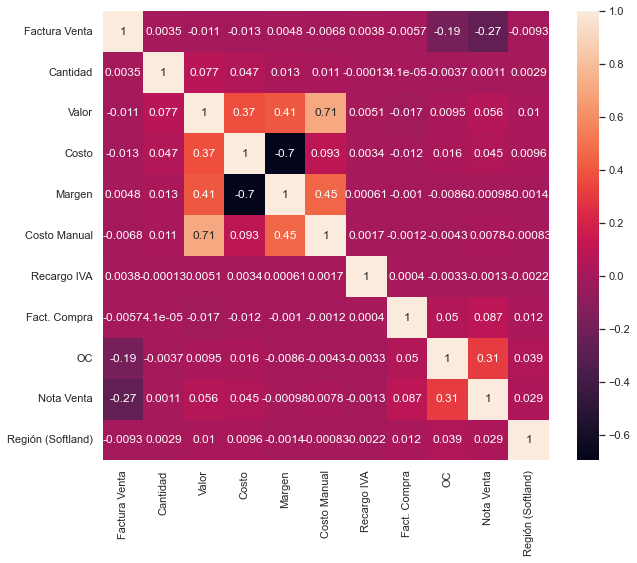

In [96]:
corrMatrix = ventas.corr()

sns.set(rc={'figure.figsize':(10,8.27)})
sns.heatmap(corrMatrix, annot=True)

A continuación, se estudia la distribución del campo "Valor" de las ventas. Para evitar malas interpretaciones se excluiran datos que superen las tres desviaciones estándar en su rango. Así mismo se incluye un línea de mejor ajuste posible asumiendo una distribución normal de los datos.

(188316,)


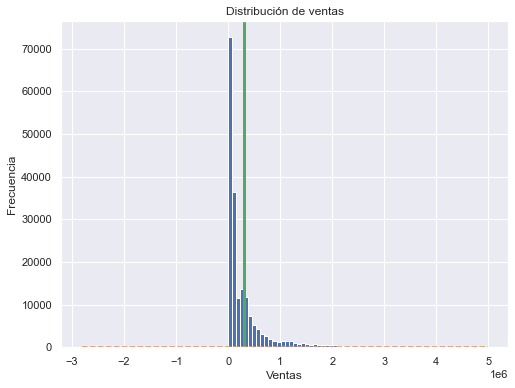

In [97]:
# Primero vamos a filtrar valores outliers
filtered_sales = ventas[(np.abs(stats.zscore(ventas["Valor"])) < 3)]["Valor"]
print(filtered_sales.shape)

# Graficar ventas
plt.figure(figsize = (8,6))
nbins = 100
n, bins, patches = plt.hist(filtered_sales,
                            bins=nbins)

# Agregar etiquetas a ejes y título
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")
plt.title("Distribución de ventas")

# Computar la media y la desviación estándar
mu = filtered_sales.mean()
sigma = filtered_sales.std()

# Dibujar línea vertical para el valor medio
plt.axvline(x=mu, linewidth=3, color = 'g')

# Agregar curva de mejor ajuste para la distribución normal
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

# Graficar la distribución normal
plt.plot(bins, y, '--')

# Mostrar el gráfico
plt.show()

#### *Ventas en el tiempo marcadas por Grupo*

Es de esperar que las agrupaciones y subagrupaciones de ventas resulten ser una forma natural de aglomerar conversiones con características similares. Por eso en secciones subsecuentes nos concentraremos en analizar los grupos más importantes y su evolución en el tiempo.

In [98]:
from matplotlib.ticker import MaxNLocator

def plot_grouped(df, key, x_axis, y_axis, legend=None):
    """Función para plotear valores en un gráfico de dispersión
    agrupados según una clave
    
    Args:
    df [pandas.DataFrame]: Dataframe con valores
    key [str]: nombre de columna para agrupar
    x_axis [str]: nombre de valores en eje X
    y_axis [str]: nombre de valroes en eje Y
    """
    grupos = np.unique(df[key].values)
    cmap = plt.get_cmap('Paired')
    color_list = cmap(np.linspace(0, 1, len(grupos)))
    
    fig, ax = plt.subplots(figsize=(15, 10))
    for grupo in grupos:
        color = color_list[np.where(grupos == grupo)].tolist()[0]
        c = matplotlib.colors.to_hex(color, keep_alpha=True)
        label=None
        if legend: label = grupo
        df[df[key]==grupo].plot.scatter(
            x=x_axis,
            y=y_axis,
            c=c,
            s=5,
            ax=ax,
            label=label)

    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.set_ylim(0,1000000)
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Monto de venta (CHP)')
    ax.set_title("Disperción de ventas")
    ax.grid(ls=':', color='gray')
    ax.legend(markerscale=5)

    plt.show()

Como son demasiados grupos, vamos a filtar un poco los datos y quedarnos solo con los grupos de ventas más importantes, estos son grupos con más de 10.000 ocurrencias de ventas.

In [99]:
by_groups = ventas.groupby("Grupo")
group_count = by_groups["Cantidad"].count()
mayor_groups = pd.Series(group_count).where(lambda x : x > 10000).dropna().index.tolist()

mayor_sales = ventas.where(lambda x : x.Grupo.isin(mayor_groups)).dropna()

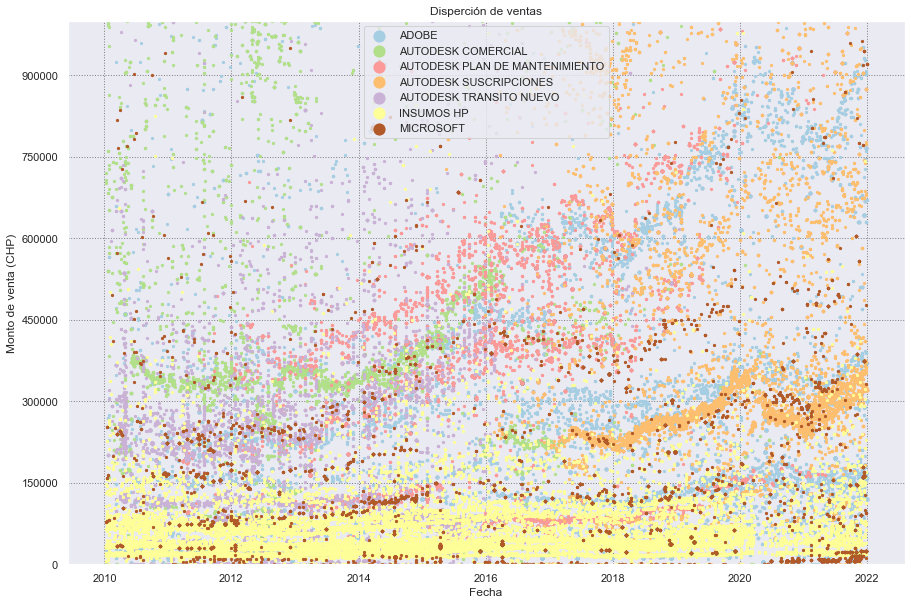

In [100]:
plot_grouped(df=mayor_sales,
             key="Grupo",
             x_axis="Fec. Fact. Venta",
             y_axis="Valor",
             legend=True)

##### Análisis
De este gráfico podemos obtener información valiosa sobre el comportamiento de la ventas en los últimos años. En general, se puede observar el efecto del comienzo de la pandemia al final del primer trimestre y comienzo del segundo trimestre de 2020. Seguido de una tendencia a la baja que termina a principio del tercer trimestre, donde se revierte la tendencia. Dicho crecimiento se mantiene hasta la actualidad.

Las ventas en la base del gráfico que tienen un mayor volumen pero menor monto de venta, corresponden a "INSUMOS HP". El volumen de ventas de este grupo ha permanecido estable desde el inicio del registro en 2010. Esto productos, aunque de menor costo, constituyen una buena base en el flujo caja, que ha probado ser estable durante más de una década.

Otro grupo que llama la atención es la evoución de ventas en suscripciones Autodesk. En color naranja se puede observar la concetración de ventas en años más recientes. Estas ventas en suscripciones son una línea fuerte en el esquema de negocio de la empresa. Lo que puede inferirse por la densidad de los puntos en el gráfico y su ubicación promedio en $300.000 (CLP).

Finalmente, es intersante notar que el grupo "ADOBE", en color azul claro, parece estar dividido en tres curvas evolutivas de ventas: la primera a una altura de 150.000 CLP, la segunda a 300.000 CLP y la tercera en un franco crescimiento, aunque menos densa, llegando a montos de 900.000 CLPen la actualidad. Esto está de acuerdo con tres líneas de clinetes para la marca ADOBE: 1) Línea Comerial, 2) Línea Educacional y 3) Línea Gobierno.

#### Ventas de Autodesk

Las ventas en color azul oscuro están relacionadas con la marca Autodesk. Vamos a ver más de cerca que subgrupos de esta marca establecen la tendencia de ventas.

In [101]:
autodesk = ventas[ventas["Grupo"] == "AUTODESK SUSCRIPCIONES"]

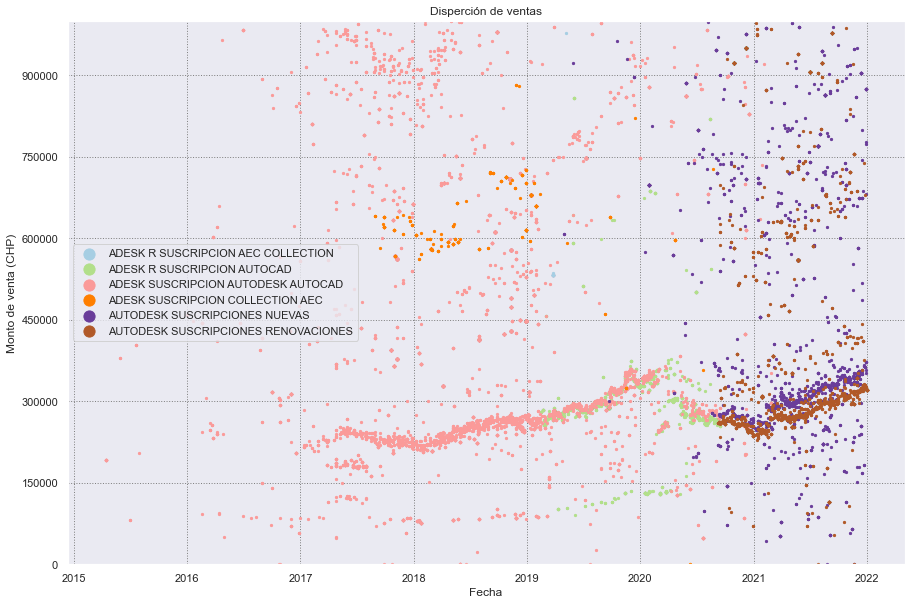

In [102]:
main_groups = ["AUTODESK SUSCRIPCIONES RENOVACIONES",
               "AUTODESK SUSCRIPCIONES NUEVAS",
               "ADESK SUSCRIPCION AUTODESK AUTOCAD",
               "ADESK R SUSCRIPCION AUTOCAD",
               "ADESK SUSCRIPCION COLLECTION AEC",
               "ADESK R SUSCRIPCION AEC COLLECTION"]
plot_grouped(df=autodesk[autodesk["Subgrupo"].isin(main_groups)],
             key="Subgrupo", 
             x_axis="Fec. Fact. Venta",
             y_axis="Valor",
             legend=True)

##### Análisis
Luego de la parálisis temporal de ventas en el segundo trimestre de 2020 debido a pandemia, las ventas por suscripciones de Autodesk tienden a la baja. Sin embargo, hay un claro cambio de tendencia desde inicios de 2021. Lo anterior está de acuerdo a la reactivación del mercado luego del primer año de pandemia. También se puede ver dos líneas paralelas que diferencian las suscripciones de las renovaciones. Esto no se vé previo al evento de pandemia, donde los nuevos clientes y los clientes recurrentes parecen estar unidos en la misma línea de tendencia.

#### Clustering para ventas según densidad

En los gráficos anteriores podemos observar que hay grupaciones de ventas que tienen a ser más densas. Estas agrupaciones tienen tendencias al alta y a la baja. Parece ser una buena idea agrupar estos grupos de ventas por densidad. Este tipo de agrupación o "clustering" permitiría definir lineas de negocio en crescimiento y tomar desciciones más acertadas para potenciarlas, dividirlas o anularas en función de su comportamiento.

Vamos a empezar por acotar el dataset. Utilizar todo el dataset puede generar demsiado ruido para el algoritmo de clustering. El algoritmo a utilizar es un modelo de *Mezcla Gaussiana Bayesiana*. Debido a que este algoritmo utiliza una función de densidad probabilistica multivariable, vamos a quedarnos con la zona donde la ventas parecen ser más densas. Esto ocurre para montos inferiores a $1.000.000. También, vamos a descargar valores atípicos que sean negativos. Pues solo queremos concentrarnos en ventas reales.

Más información sobre [Modelos de Mezcla Gaussiana](https://scikit-learn.org/stable/modules/mixture.html#gmm) puede ser hallado en el siguiente [link](https://scikit-learn.org/stable/modules/mixture.html#gmm).

In [103]:
# Filtrado de dataset para aplicar clustering por densidad
data = ventas[ventas["Valor"]<1000000][ventas["Valor"]>0]


c:\users\user\documents\master en bi y ds\99 proyecto final\cuadernos\venv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


A fin de faciltiar la agrupación debemos normalizar los datos de entrada. Si estos datos no son escalados la distancia entre los puntos producido por diferencia de escalas entre las características pudiera generar agrupaciones espúreas.

In [104]:
from sklearn import preprocessing

def datetime_to_int(date):
    integer = date.year * 8760 + date.month * 720 + date.day * 24 + date.hour
    return integer

data["fecha_int"] = data["Fec. Fact. Venta"].apply(datetime_to_int)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data["Valor"].values.reshape(-1, 1))
data["v_norm"] = x_scaled
data["index"] = np.linspace(0,1,data.shape[0])

features = ["index", "v_norm"]

In [105]:
from sklearn.mixture import BayesianGaussianMixture

# Configuramos el modelo con hasta 10 agrupaciones posibles.
model = BayesianGaussianMixture(n_components=10)

In [106]:
# Ajustamos / entrenamos el modelo
model.fit(data[features])

c:\users\user\documents\master en bi y ds\99 proyecto final\cuadernos\venv\lib\site-packages\sklearn\mixture\_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


BayesianGaussianMixture(n_components=10)

In [107]:
# Datos de entrada
X = data[features].values
# Hacer predicciones de cluster/agrupación
yhat = model.fit_predict(X)
# Devolvar clusters únicos
clusters = np.unique(yhat)
print(len(clusters))

10


c:\users\user\documents\master en bi y ds\99 proyecto final\cuadernos\venv\lib\site-packages\sklearn\mixture\_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,


Finalmente, vamos a visualizar el resultado del clustering sobre el mismo dominio de ventas.

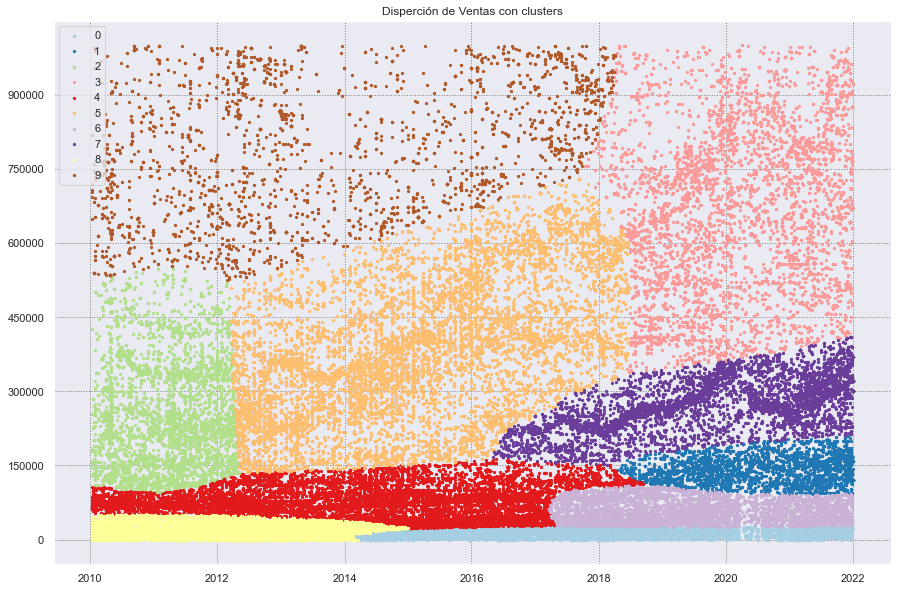

In [108]:
cmap = plt.get_cmap('Paired')
color_list = cmap(np.linspace(0, 1, len(clusters)))
fig, ax = plt.subplots(figsize=(15, 10))
for i, cluster in enumerate(clusters):
    color = color_list[i].tolist()
    c = matplotlib.colors.to_hex(color, keep_alpha=True)
    data.iloc[np.where(yhat == cluster)[0].tolist()].plot.scatter(
        x="Fec. Fact. Venta",
        y="Valor",
        c=c,
        s=5,
        ax=ax,
        label=cluster)

ax.yaxis.set_major_locator(MaxNLocator(8))
# ax.set_ylim(0,1000000)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title("Disperción de Ventas con clusters")
ax.grid(ls=':', color='gray')

plt.show()

Ahora, vamos a estudiar los cuatro (4) grupos de ventas que llegan a la actualidad. Utilizando la leyenda de colores estos grupos corresponden a los números: 

- Grupo A - 1 (azul oscuro)
- Grupo B - 2 (verde)
- Grupo C - 5 (naranja)
- Grupo D - 0 (azul claro)
- Grupo E - 4 (rojo)

Lo que buscamos es extraer datos de productos y clientes asociados a esas ventas.

In [109]:
group_a = data.iloc[np.where(yhat == 1)[0].tolist()]
group_b = data.iloc[np.where(yhat == 2)[0].tolist()]
group_c = data.iloc[np.where(yhat == 5)[0].tolist()]
group_d = data.iloc[np.where(yhat == 0)[0].tolist()]
group_e = data.iloc[np.where(yhat == 4)[0].tolist()]

cluster_groups = [group_a, group_b, group_c, group_d, group_e]

In [110]:
by_group = group_a.groupby("Grupo")
maxi = by_group["Cantidad"].count().max()
by_group.sum().max()


Factura Venta        1.234046e+08
Cantidad             6.211000e+03
Valor                8.907219e+08
Costo                7.546939e+08
Margen               1.360280e+08
Costo Manual         2.382260e+07
Recargo IVA          0.000000e+00
Fact. Compra         4.258801e+11
OC                   1.873786e+08
Nota Venta           8.333268e+08
Región (Softland)    7.783300e+04
fecha_int            1.099272e+11
v_norm               8.912959e+02
index                5.341770e+03
dtype: float64

In [111]:
for group in cluster_groups:
    i = 0
    by_group = group.groupby("Grupo")
    count = by_group["Cantidad"].count().max()
    
    print(f"Grupo {i}: Max {count}")
    

Grupo 0: Max 6211
Grupo 0: Max 3205
Grupo 0: Max 8553
Grupo 0: Max 4001
Grupo 0: Max 13850


In [112]:
# Descripción de columnas numéricas
group_d.describe(include=[float, int]).T

,count,mean,std,min,25%,50%,75%,max
Factura Venta,22314.0,1.694672e+04,1.224893e+04,1.000000e+00,6.984000e+03,1.566200e+04,2.275700e+04,4.510200e+04
Cantidad,22314.0,1.168056e+00,7.403994e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01
Valor,22314.0,1.200612e+04,6.692000e+03,1.000000e+00,5.532000e+03,1.292800e+04,1.763300e+04,2.800000e+04
Costo,22314.0,1.190757e+04,3.399123e+04,-7.079700e+04,4.888000e+03,7.380000e+03,1.354200e+04,2.000000e+06
Margen,22314.0,9.857197e+01,3.408275e+04,-1.985000e+06,3.590000e+02,1.550000e+03,3.689000e+03,7.992500e+04
Costo Manual,22314.0,2.880006e+02,2.013187e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.005220e+05
Recargo IVA,22314.0,6.241821e-01,6.592882e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.964000e+03
Fact. Compra,22314.0,7.994181e+08,3.037180e+09,-1.000000e+00,2.450100e+04,7.038250e+05,1.774923e+06,1.320000e+10
OC,22314.0,2.676665e+04,2.382123e+04,-1.000000e+00,1.800800e+04,2.344100e+04,3.049900e+04,1.383150e+05
Nota Venta,22314.0,1.235149e+05,2.245376e+04,0.000000e+00,1.196552e+05,1.266210e+05,1.340380e+05,1.417700e+05


In [113]:
# Descripción de columnas tipo string
group_d.describe(include=[object]).T

,count,unique,top,freq
Cod. Producto,22314,522,SKETCHUPEDULAB,3036
Descripción,22314,514,SKETCHUP / EDU LAB/RED/SUBSCRIPTION/1 AÑO,3036
Grupo,22314,35,MICROSOFT,4001
Subgrupo,22314,70,MICROSOFT COMERCIAL,3789
Rut,22314,1580,61.106.000-9,4033
Cliente,22314,1580,ASTILLEROS Y MAESTRANZAS DE LA ARMADA,4033
Industria,22314,70,EDUCACION,5896
Vendedor,22314,43,CLAUDIA CHACÓN,5904
Tipo Vendedor,22314,5,VENDEDOR,16040
Proveedor,22314,153,INGRAM MICRO CHILE S.A.,8475


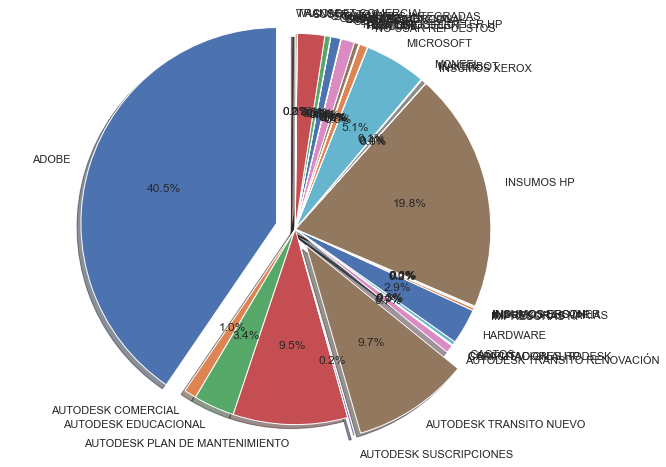

In [114]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
groups_in_d = group_e.groupby("Grupo").count()
labels = groups_in_d.index
# Tomemos solo las etiquetas para los grupos principales
major_groups = ["AUTODESK SUSCRIPCIONES",
                "ADOBE",
                "AUTODESK SWITCH M2S",
                "AUTODESK TRANSITO NUEVO",
                "AUTODESK COMERCIAL",
                "AUTODESK EDUCACIONAL"]
#labels = [label if label in major_groups else "" for label in labels]
sizes = groups_in_d["Cantidad"]
explode = np.zeros(len(labels))
# Solo explotar "AUTODESK SUSCRIPCIONES"
explode[0] = 0.1
explode[4] = 0.1
explode[5] = 0.1

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Datos de Variables Macroeconómicas

Hasta ahora se han analizado datos internos a la empresa, provenientes del CRM. Ahora se procede a visualizar datos de variables macroeconómicas relacionadas al mercado de la empresa y ver su relación con los patrones de venta internos.

En primer lugar, se visualizarán las características básicas del conjunto de datos. Estos datos externos fueron tomados desde la página oficial del Banco Central de Chile. El DataFrame consta de las siguientes columnas:
- **USDCHP** Cambio del peso chileno frente al dolar.
- **IPC**: Índice de Precios al Consumidor: es un indicador económico elaborado y publicado por el Instituto Nacional de Estadística (INE) de Chile, que mide mes a mes la variación conjunta de los precios de una canasta de bienas y servicios representativa del consumo de los hogares del país.
- **IMACEC**: Índice Mensual de ACtividad EConómica. Es una estimación que resume la actividad de los distintos sectores de la economía en un determinado mes, comparado con precios del año anterior; su variación interanual constituye una aproximación de la evolución del PIB. El cálculo del IMACEC se basa en múltiples indicadores de oferta que son ponderqados por la participación de las actividades económicas dentro del PIB en el año anterior.
- **PIB**: Producto Interno Bruto. Indicador económico que refleja el valor monetario de todos los bienes y servicios finales producidos por un territorio en un determinado período de tiempo. Se usa para mediar la riqueza que genera un país.
- **TCM**: Tipo de Cambio Multilateral. Es un indicador que mide el precio relativo de bienes y servicios de una economía con respecto a los de un grupo de países con los cuales se realizan transacciones comerciales.
- **TDN**: Tasa de Desocupación Nacional. Tasa de desempleo.
- **UF**: Unidad de Fomento. Su finalidad original era la revalorización de los ahorros de acuerdo con las variaciones de la inflación, permitiendo que el dinero horrado en bancos y cajas mantuvieran su poder adquisitivo.

In [115]:
vme.head(2)

,USDCHP,IPC,IMACEC,PIB,TCM,TDN,UF
Fecha,,,,,,,
2010-01-01,507.1,0.5,2.0,27890.0,103.41,9.23,20939.49
2010-01-02,507.1,0.5,2.0,27890.0,103.41,9.23,20936.11


In [116]:
vme.describe().T

,count,mean,std,min,25%,50%,75%,max
USDCHP,4416.0,619.899706,108.212642,455.91,511.1275,631.81,693.6025,868.76
IPC,4416.0,0.287432,0.298874,-0.50,0.1000,0.30,0.5000,1.30
IMACEC,4416.0,3.353804,5.197100,-15.30,1.4000,3.00,5.1000,20.60
PIB,4416.0,35376.594656,3251.088396,27890.00,33419.0000,35802.00,37920.0000,40536.00
TCM,4416.0,105.809130,6.611543,92.38,100.6850,105.56,110.1525,124.90
TDN,4416.0,7.435097,1.445942,5.78,6.5400,7.06,7.5500,13.09
UF,4416.0,25350.053447,2748.057817,20849.68,22830.1750,25629.09,27560.9650,31228.70


Vamos a continuación a crear gráficos individuales para ver más de cerca la evolución de estas variables en el tiempo.

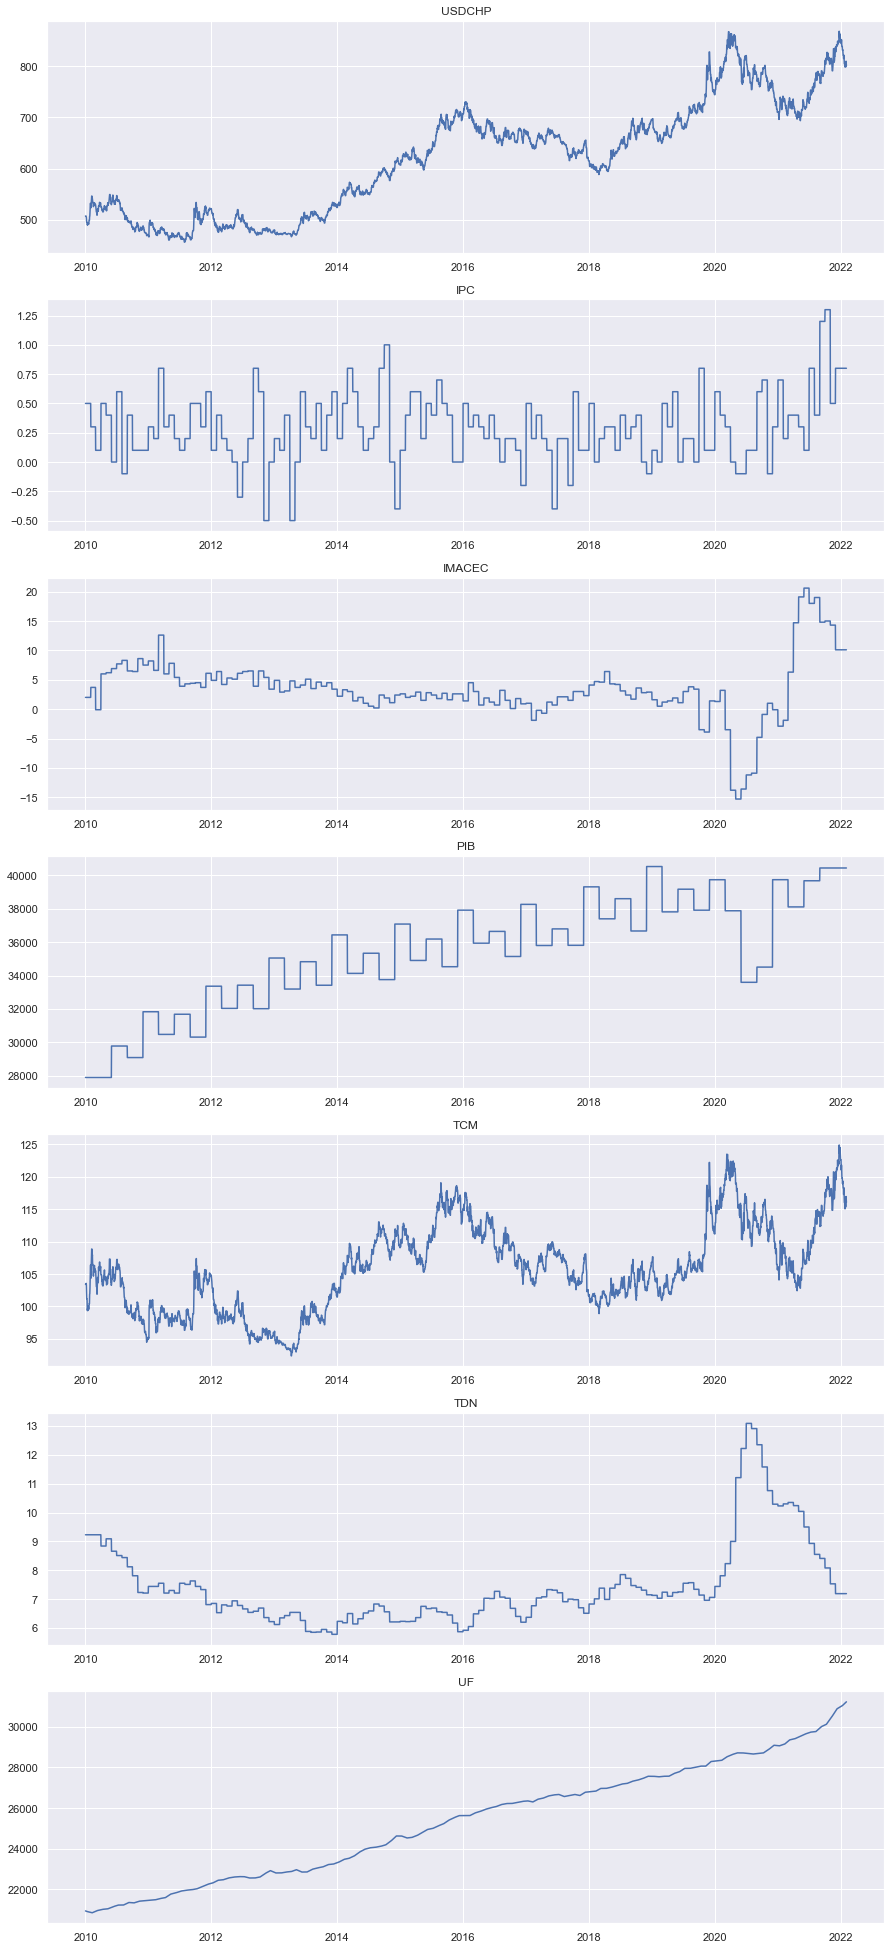

In [131]:
fig, axs = plt.subplots(7, 1, figsize=(15, 35))

for i, column in enumerate(vme.columns):
    axs[i].plot(vme.index, vme[column])
    axs[i].set_title(column)

Vemamos el gráfico de valor de ventas por fechas.

Text(0.5, 1.0, 'Valor de ventas')

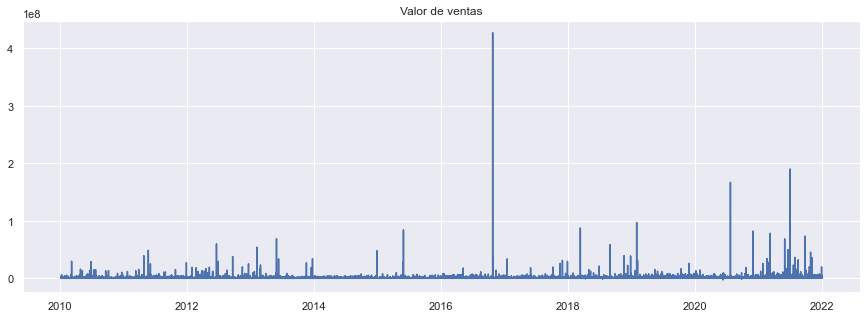

In [118]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ventas["Fec. Fact. Venta"], ventas["Valor"])
ax.set_title("Valor de ventas")

A fin de concatenar los valores de ventas con las variables macroeconómicas del mercado será necesario utilizar un mismo rango de fechas. A continuación se hace uso de la herramienta de agrupación para crear índices por niveles correspondientes a: años, meses y días. Debido a que el nivel más granular de los datos serán el rango diario, se obta por sumar los valores de cada día en ventas. De esta forma se garantiza tener un único valor por día. 

Con los datos indexados por año, mes y día será posible unir los valores de ventas con los valores de variables macroeconómicas que compartan en mísmo indice (Datetime)

In [119]:
date_index = ventas.set_index('Fec. Fact. Venta')
by_date = date_index.groupby([lambda x: x.year, lambda x: x.month, lambda x: x.day]).sum()

In [120]:
from datetime import datetime
data = {
    "date": [datetime(i[0], i[1], i[2]) for i in by_date["Valor"].index],
    "sell": [sell for sell in by_date["Valor"]]
}


In [121]:
sell_by_date = pd.DataFrame(data=data)

In [122]:
sell_by_date.head()

,date,sell
0,2010-01-08,10440592.0
1,2010-01-11,15377130.0
2,2010-01-12,11632624.0
3,2010-01-13,5536632.0
4,2010-01-15,6288769.0


In [123]:
date_range = pd.date_range(start=vme.index.min(), end=vme.index.max())

In [124]:
df = pd.DataFrame(data={"date":date_range})

In [125]:
m = pd.merge(df, vme, how="left", left_on="date", right_on="Fecha")
m = pd.merge(m, sell_by_date, how="left", on="date")
m = m.fillna(value=0)
m.set_index("date", inplace=True)
m.head(10)

,USDCHP,IPC,IMACEC,PIB,TCM,TDN,UF,sell
date,,,,,,,,
2010-01-01,507.10,0.5,2.0,27890.0,103.41,9.23,20939.49,0.0
2010-01-02,507.10,0.5,2.0,27890.0,103.41,9.23,20936.11,0.0
2010-01-03,507.10,0.5,2.0,27890.0,103.41,9.23,20932.72,0.0
2010-01-04,507.10,0.5,2.0,27890.0,103.41,9.23,20929.34,0.0
2010-01-05,505.70,0.5,2.0,27890.0,103.56,9.23,20925.95,0.0
2010-01-06,504.22,0.5,2.0,27890.0,103.30,9.23,20922.57,0.0
2010-01-07,497.93,0.5,2.0,27890.0,102.02,9.23,20919.19,0.0
2010-01-08,494.54,0.5,2.0,27890.0,101.19,9.23,20915.80,10440592.0
2010-01-09,494.54,0.5,2.0,27890.0,101.19,9.23,20912.42,0.0


En este punto se obta por agrupar los valores con una periodicidad mensual. Y luego se verifica la relación que guardan las variables macroeconómicas con las ventas utilizando una matriz de correlación

In [126]:
sell_by_month = m["sell"].groupby([lambda x: x.year, lambda x: x.month]).sum()
vme_by_month = m.drop("sell", axis=1).groupby([lambda x: x.year, lambda x: x.month]).mean()

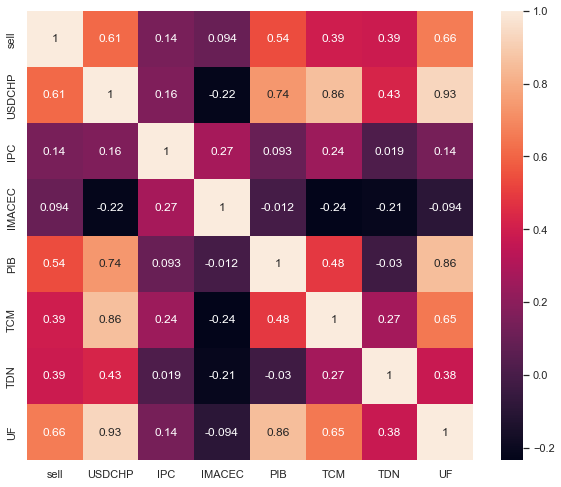

In [127]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = pd.DataFrame(data={"sell": sell_by_month})

for column in vme.columns:
    data[column] = vme_by_month[column]

corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Hay una alta relación entre las ventas mensuales y las variables macroeconómicas. Sin embargo, hay que tener presente que el valor mensual de cada variable solo se tiene luego que dicho mes termina. Por lo tanto es necesario hacer un desfase con el mes anterior para verificar su probabilidad de uso como valores predictivos.